**이미지 처리를 위해 open cv**  
**노트북 이미지 출력을 위해 matplotlib소환**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib #얼굴 검출할 때 사용하는 라이브러리
print("🌫🛸")

🌫🛸


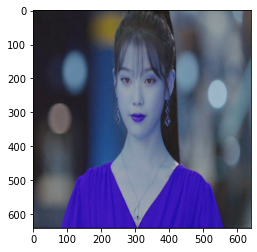

In [24]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/images.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 640))    # 640x360의 크기로 Resize 여기서 해상도를 높일수있음
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

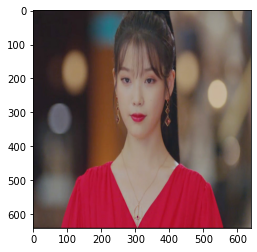

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
#opencv는 bgr로 푸른빛을 띄기에 rgb로 변환해줘야함
plt.imshow(img_rgb)
plt.show()

#### 딥러닝 사용한 최신 얼굴인식
**이미지 gradient를 feature로 사용하는 이유**

픽셀 rgb값 자체보다는 인접한 픽셀들 사이의 색상 변화율 자체에 오브젝트 특징이 더 정확히 반영될 때가 많기 때문이다.   
채도에 따라 다르게 보일 수있지만 밝기변화방향(gradient)만 고려한다면 주변상황과 무관하게 동일한 표현 가능 

**단일 픽셀의 gradient만 사용하지않고 주변을 보는 이유**  
단일픽셀의 grdient만 다루면 나무만 보고 숲을 보지 못하게 될 수있기에 이미지의 기본 패턴을 알려면 픽셀보다는 높은 수준에서 밝음/어둠의 흐름을 보는것이 더 좋다.





In [4]:
detector_hog = dlib.get_frontal_face_detector() #detector선언: 주변을 감지하고자 하는 시작인가???

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # open cv로 열면 bgr이기에 항상 rgb로 바꿔줘야함.
dlib_rects = detector_hog(img_rgb,1) # upsampling방법으로 크기를 키우는것을 피라미드라고 하는데 작게 촬영된 얼굴을 크게 볼 수 있기에 정확한 검출가능 

rectangles[[(221, 160) (407, 345)]]


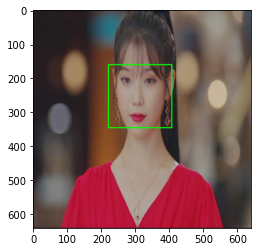

In [6]:
print(dlib_rects) # 찾은 얼굴영역 좌표 
#dlib_rects = detector_hog가 사이즈 랑 피라미드해놓은거
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 얼굴 랜드마크 

face landmark localization :이목구미의 위치를 추론하는 것  
face landmark: detection의 결과물인 bounding box로 crop한 이미지사용

#### object keypoint estimation 알고리즘 

객체 내부의 점을 찾는 기술  

1) top-down: bounding box를 찾고 box 내부의 keypoint를 예측  
2) bottom-up: 이미지 전체의 keypoint를 먼저 찾고 point 관계를 군집화 해서 box생성

#### Dlib landmark localization

모델을 저장하고 모델을 소환한다 68개의 점찾기를 시작한다.

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


point는 dlib.full_object_detection의 객체이기에 parts() 개별위치접근가능 

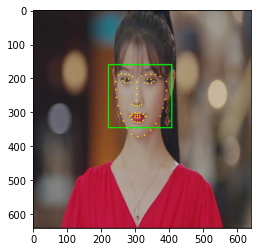

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show,point,2,(0,255,255), -1) 
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 얼굴을 인식해주다니 감사합니다. 컴퓨터여~
1. 해상도를 높여본다. 
2. 사진을 교체한다. 
3. 파라미터 수 높이기.

#### 10-5. 스티커 적용하기 
질문1. 코의 center index가 30인지 어떻게 아나요?  landmark 점 자체가 그렇게 됨.
내 코의 중심점 잡기 좌표에서 찾기.  
눈썹위 얼굴 중앙 

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[2][0]
    y = landmark[36][1] 
    w = (landmark[30][0] - x)*2
    h = (landmark[48][1] -y)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(x,y) : (244,207)
(w,h) : (118,103)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(103, 118, 3)


#### 

In [12]:
    # refined_x = x - w // 2  # left
    # refined_y = y - h       # top
    # print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [13]:
# img_sticker = img_sticker[-refined_y:]
# print (img_sticker.shape)

In [14]:
# refined_y = 0
# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [16]:
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]

In [17]:
img_show[y:y+img_sticker.shape[0], x:x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

이미지 배경을 투명하게 하고자 한다면   
np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)   
0을 255로 변경해야함 

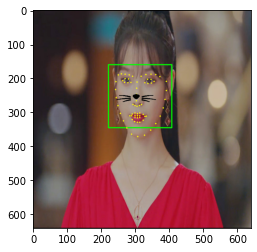

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

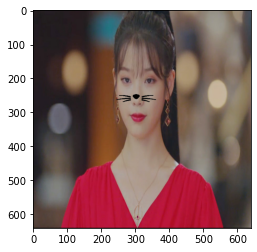

In [21]:
sticker_area = img_show[y:y+img_sticker.shape[0], x:x+img_sticker.shape[1]]
img_show[y:y+img_sticker.shape[0], x:x + img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 어떻게 조절해야 추가 스티커의 위치가 변경될 것인가.?

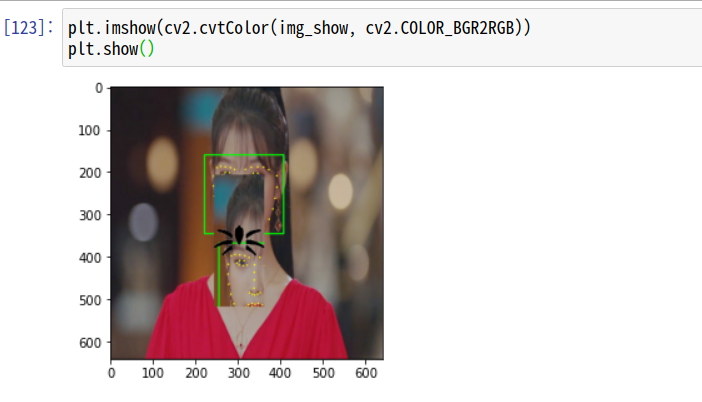
교양이 수염 볼에 붙여주려다...아이유 얼굴이 흘려내림
공부방에 올라온 기민님꺼를 참고하여 붙여넣음 landmark 수정은 아직은 미흡함. 
다른 이미지를 붙여보겠음


### 어려움
1. 얼굴을 인식하지 못함 
방법 1) 사진변경   
     2) 해상도 높이기  
      img_bgr = cv2.resize(img_bgr, (640, 640))    # 640x360의 크기로 Resize 여기서 해상도를 높일수있음  
      
      3) 파라미터 수 조절

2. 추가 이미지 배경 조절  
 + np.where(img_sticker==255,sticker_area,img_sticker) 255로 변경시 배경조절가능 
 
**대망의 이미지수정하기**  
3. 일단 landmark 밖으로 나가기에 refriend코드사용 필요없음  
 + 중점을 코로두고  w와 h등 조절 (공부방 박기민님꺼참조)
